# Predictive Modeling for Lung Cancer Detection
## Introduction
#### Lung cancer is one of the most common and deadly cancers worldwide. Early detection plays a crucial role in improving patient outcomes, as treatment options are more effective when the cancer is detected at an early stage. In this Jupyter notebook, we will explore the development of a predictive model for lung cancer detection using machine learning techniques.

## Objective
#### The primary objective of this project is to develop a predictive model that can accurately classify individuals as either having or not having lung cancer based on various risk factors and medical indicators. By leveraging historical data and machine learning algorithms, we aim to create a tool that can assist healthcare professionals in the early detection and diagnosis of lung cancer.

## Dataset
#### We will utilize a dataset containing anonymized patient data, including demographic information, medical history, lifestyle factors, and diagnostic test results. This dataset is from Kaggle.
#### Attributes:

- GENDER: Indicates the gender of the individual (M for Male, F for Female).
- AGE: Represents the age of the individual, contributing to the analysis of age-related patterns.
- SMOKING: Reflects the smoking habits of individuals, categorized to capture various levels of smoking intensity.
- YELLOW_FINGERS: Describes the presence of yellow fingers, potentially associated with lifestyle choices or health conditions.
- ANXIETY: Measures the anxiety level of individuals, offering insights into the psychological aspects of health.
- PEER_PRESSURE: Indicates the influence of peer pressure on lifestyle choices.
- CHRONIC DISEASE: Highlights the presence or absence of chronic diseases, a crucial health factor.
- FATIGUE: Reflects the level of fatigue experienced by individuals, providing information on overall health.
- ALLERGY: Indicates the presence or absence of allergies, potentially relevant to respiratory health.
- WHEEZING: Describes whether wheezing is present, a symptom often associated with respiratory issues.
- ALCOHOL CONSUMING: Indicates the alcohol consumption habits of individuals, which can impact overall health.
- COUGHING: Represents the occurrence and severity of coughing, a respiratory symptom.
- SHORTNESS OF BREATH: Indicates the presence or absence of shortness of breath, another respiratory indicator.
- SWALLOWING DIFFICULTY: Describes difficulties in swallowing, potentially linked to respiratory or other health concerns.
- CHEST PAIN: Indicates the presence or absence of chest pain, a symptom associated with various health conditions.
- LUNG_CANCER: The target variable, specifying whether the individual has been diagnosed with lung cancer (YES or NO).

# Methodology
## Approach
### The methodology for developing the predictive model for lung cancer detection involves several key steps:

## 1. Exploratory Data Analysis (EDA)
#### We will conduct comprehensive exploratory data analysis to gain insights into the dataset. This includes analyzing the distribution of variables, identifying correlations, and exploring potential relationships between features and the target variable (lung cancer diagnosis).

## 2. Data Preprocessing
#### Before model training, we will preprocess the data. This may involve handling missing values, encoding categorical variables, and performing feature scaling. Additionally, we may extract or create new features from the existing dataset to enhance the predictive power of our model.

## 3. Model Selection and Training
### We will explore various machine learning algorithms to create the best fitting model for the task of lung cancer detection. Algorithms such as logistic regression, decision trees, random forests, and gradient boosting will be considered. The selected model will be trained on the training dataset.

## 4. Model Evaluation
### The performance of our trained model will be evaluated on a separate test dataset to ensure its generalizability and reliability. We will assess various evaluation metrics and explore techniques for model interpretation and visualization to gain insights into the factors influencing the prediction of lung cancer.

## 5. Cross-Validation
#### To further validate the robustness of our model, we will employ cross-validation techniques. This involves splitting the dataset into multiple subsets, training the model on different subsets, and evaluating its performance across various folds.

## 6. Hyperparameter Tuning
#### We will fine-tune the hyperparameters of our model to optimize its performance. This process involves systematically searching for the best combination of hyperparameters using techniques such as grid search or random search.

## 7. Model Saving
#### Once our model is trained and optimized, we will save it to disk for future use. This ensures that the model can be easily deployed and utilized in real-world applications.

## Conclusion
#### This Jupyter notebook serves as a comprehensive guide to building a predictive model for lung cancer detection. By leveraging machine learning techniques and healthcare data, we aim to contribute to the early detection and management of this deadly disease, ultimately improving patient outcomes and saving lives.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from IPython.display import display, HTML
import joblib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="The `size` parameter has been renamed to `height`")

In [2]:
data = pd.read_csv('Lung_Cancer_Dataset.csv')

# Explore Dataset

In [3]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
data.describe(include='all')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270
mean,NaN,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,NaN
std,NaN,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,NaN
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN


# Visualize Data

Text(0.5, 1.0, 'Count of GENDER')

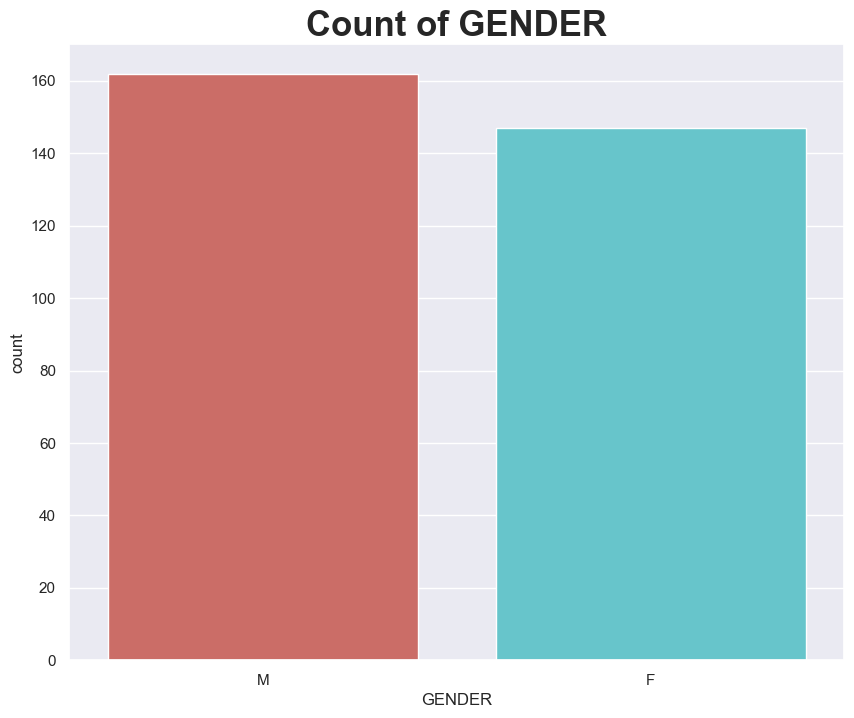

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(data,x=data['GENDER'],palette='hls')
plt.title('Count of GENDER', fontsize=25, fontweight='bold')

In [8]:
gen_num = f"<h3>The data contains a sample of {data[data['GENDER']=='M'].shape[0]} males and {data[data['GENDER']=='F'].shape[0]} females.</h3>"
display(HTML(gen_num))

Text(0.5, 1.0, 'GENDER vs CANCER')

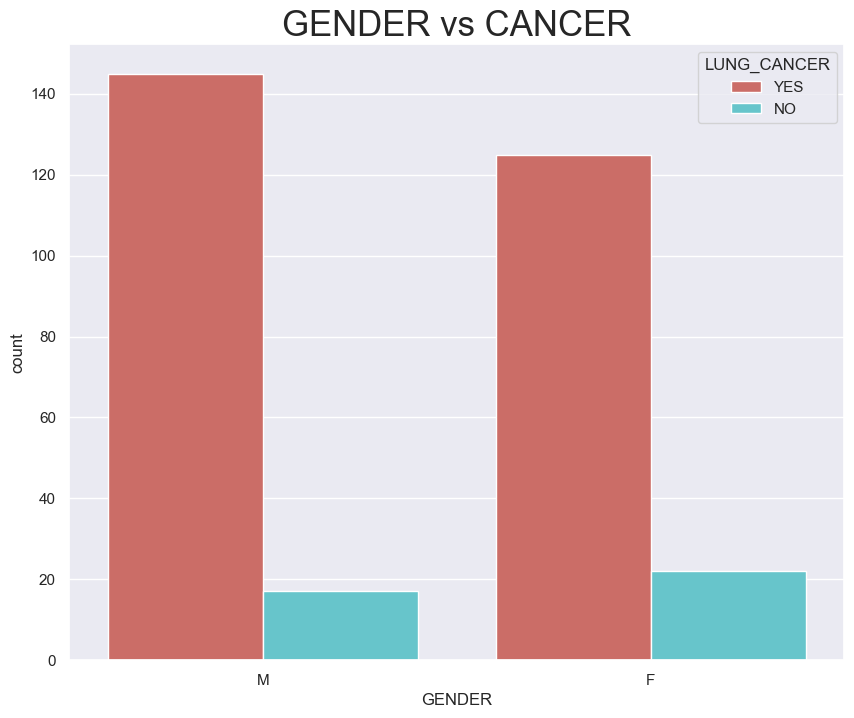

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(data,x=data['GENDER'],hue=data['LUNG_CANCER'],palette='hls')
plt.title('GENDER vs CANCER',fontsize=25)

In [10]:
gen_num_by_can = f"<h3>Males diagnosed with Lung Cancer are {data[(data['GENDER'] == 'M') & (data['LUNG_CANCER'] == 'YES')].shape[0]} and cancer free are {data[(data['GENDER'] == 'M') & (data['LUNG_CANCER'] == 'NO')].shape[0]}<br>Females diagnosed with Lung Cancer are {data[(data['GENDER'] == 'F') & (data['LUNG_CANCER'] == 'YES')].shape[0]} and cancer free are {data[(data['GENDER'] == 'F') & (data['LUNG_CANCER'] == 'NO')].shape[0]}.</h3>"
display(HTML(gen_num_by_can))

<h3>Lets visualize the ages distribution in our dataset filtered by diagnosed Lung Cancer column</h3>

Text(0.5, 1.0, 'AGE vs CANCER')

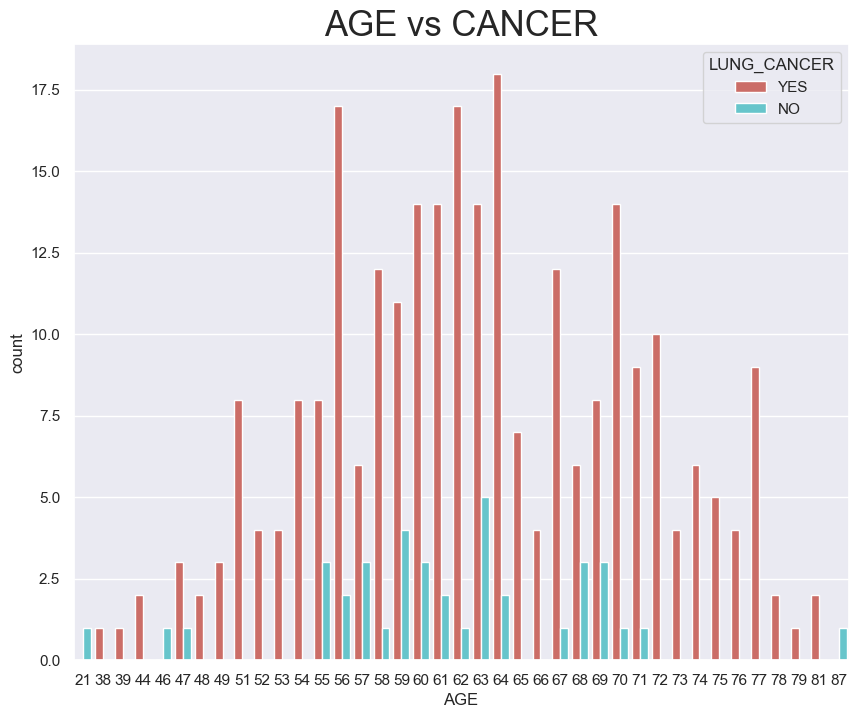

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(data,x=data['AGE'],hue=data['LUNG_CANCER'],palette='hls')
plt.title('AGE vs CANCER',fontsize=25)

Text(0.5, 1.0, 'AGE vs CANCER')

<Figure size 1000x800 with 0 Axes>

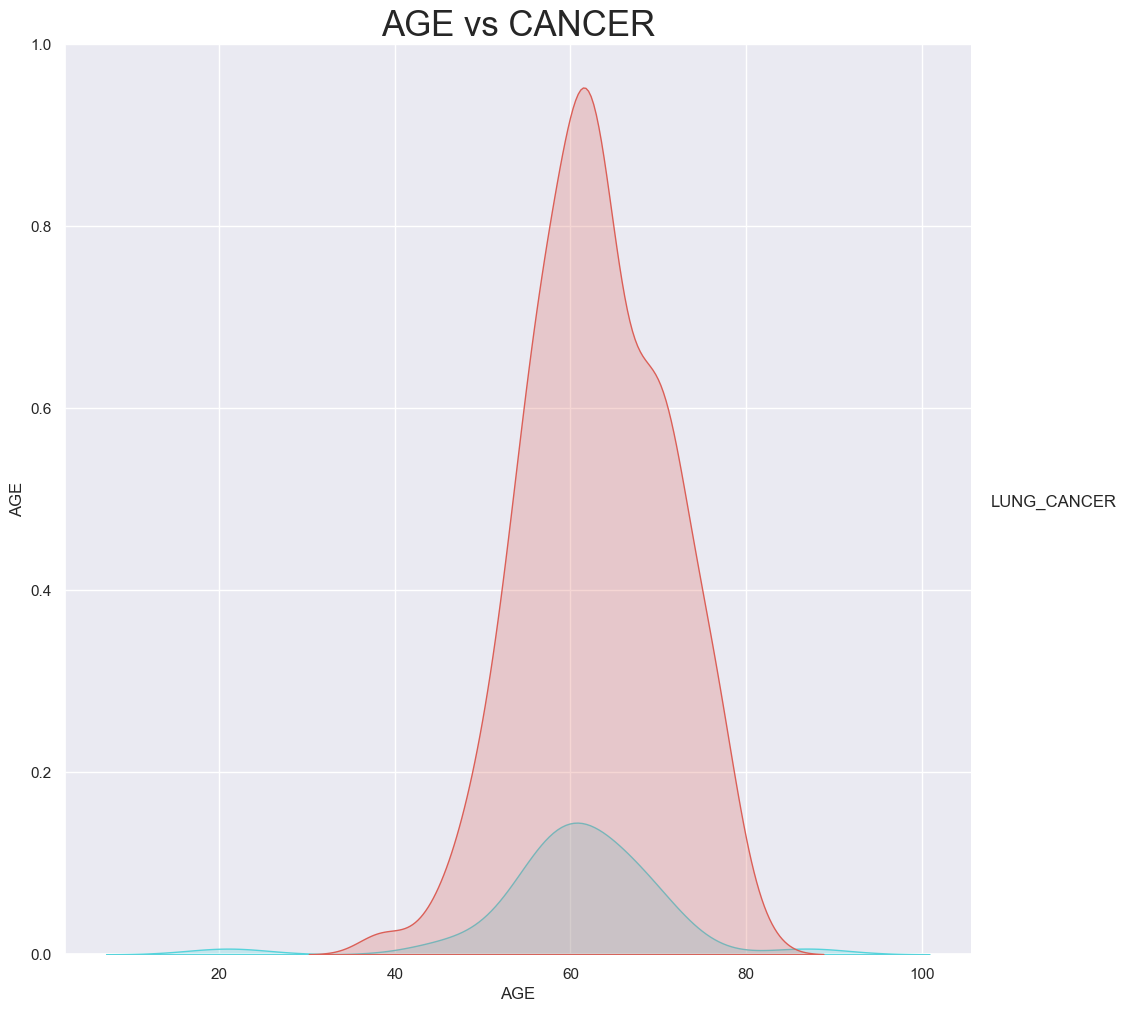

In [12]:
plt.figure(figsize=(10,8))
sns.pairplot(data,vars=['AGE'],hue='LUNG_CANCER',height=10,palette='hls')
plt.title('AGE vs CANCER',fontsize=25)

<h3>Our dataset is unbalanced and contains with more people diagnosed with Lung Cancer than people that are cancer free.</h3>

<h3>Lets create histograms for all our dataset and visualize our columns distributions..</h3>

array([[<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'SMOKING'}>,
        <Axes: title={'center': 'YELLOW_FINGERS'}>,
        <Axes: title={'center': 'ANXIETY'}>],
       [<Axes: title={'center': 'PEER_PRESSURE'}>,
        <Axes: title={'center': 'CHRONIC DISEASE'}>,
        <Axes: title={'center': 'FATIGUE '}>,
        <Axes: title={'center': 'ALLERGY '}>],
       [<Axes: title={'center': 'WHEEZING'}>,
        <Axes: title={'center': 'ALCOHOL CONSUMING'}>,
        <Axes: title={'center': 'COUGHING'}>,
        <Axes: title={'center': 'SHORTNESS OF BREATH'}>],
       [<Axes: title={'center': 'SWALLOWING DIFFICULTY'}>,
        <Axes: title={'center': 'CHEST PAIN'}>, <Axes: >, <Axes: >]],
      dtype=object)

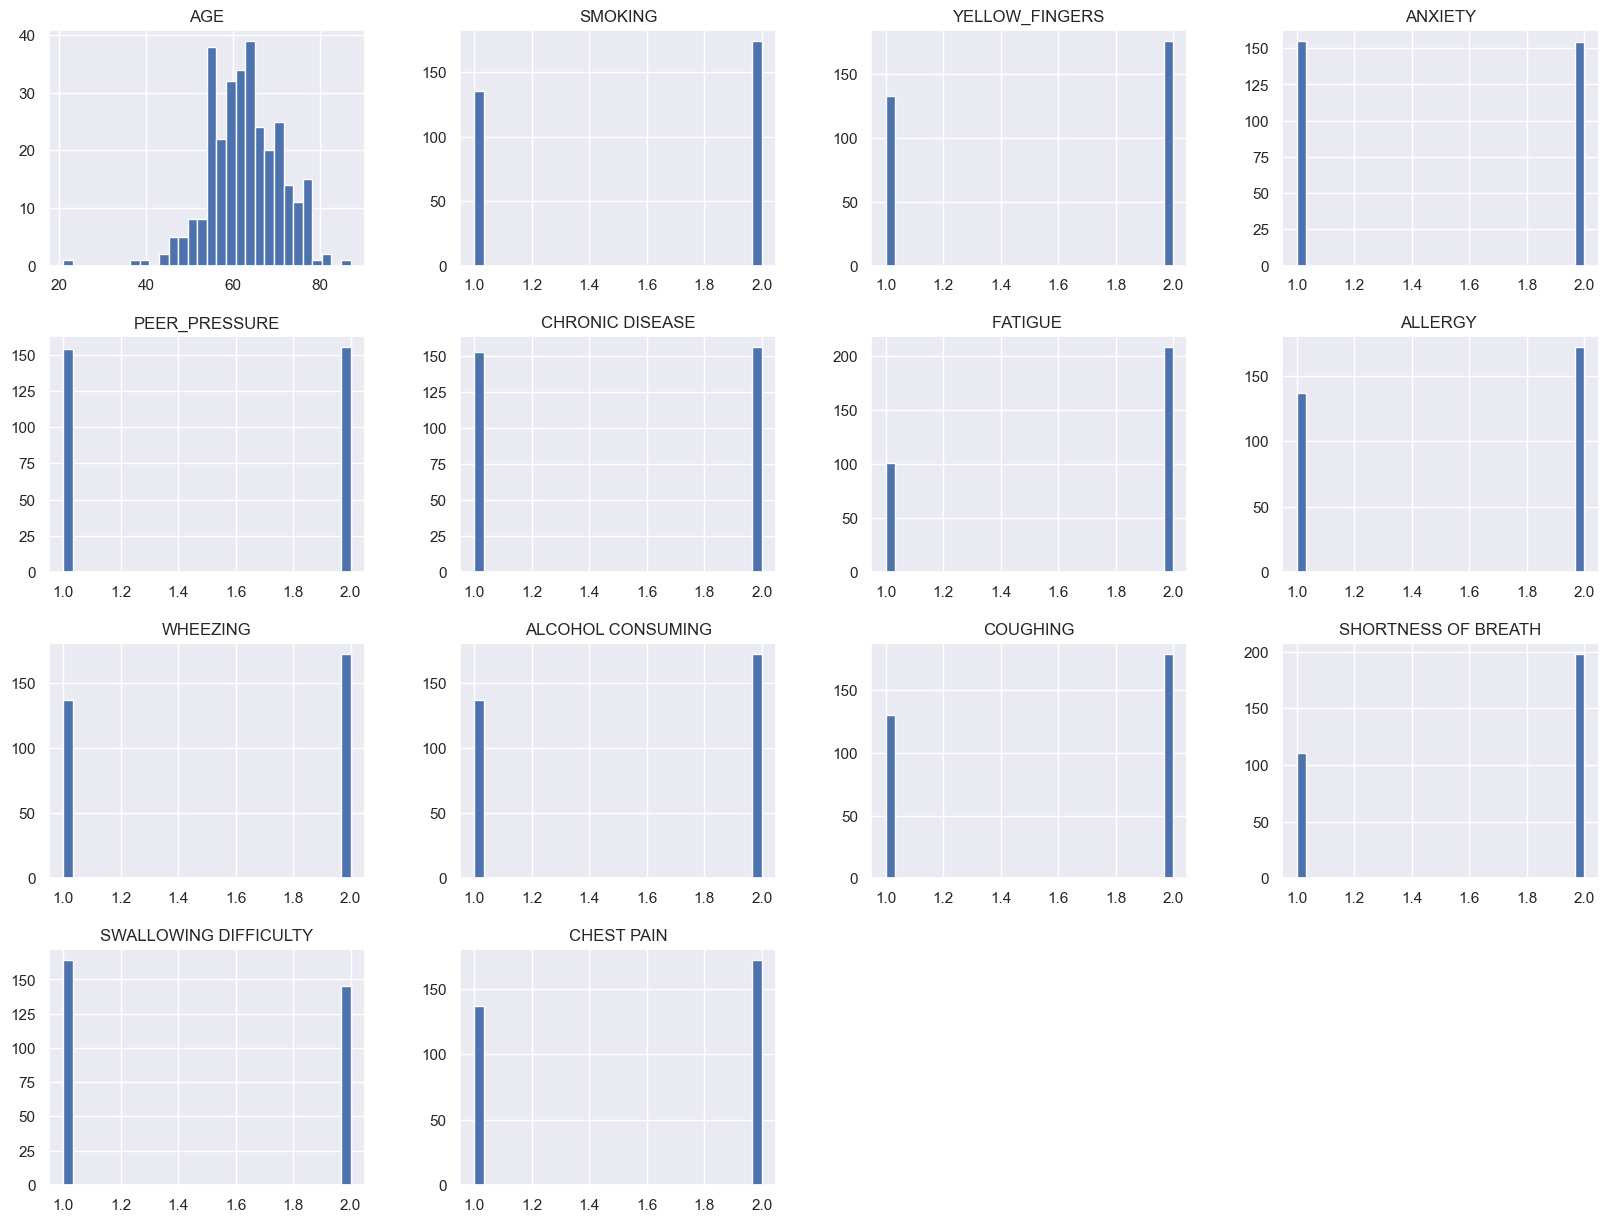

In [13]:
data.hist(bins=30,figsize=(20,15))

<h3>Age distribution is fairly distributed with the exception of the 56 years old patients.</h3>
<h3>On all the other columns which are binary there is not a notable uneven distribution.</h3>

<h3>Now lets pair plot each column filtered by Cancer_Lung column.</h3>


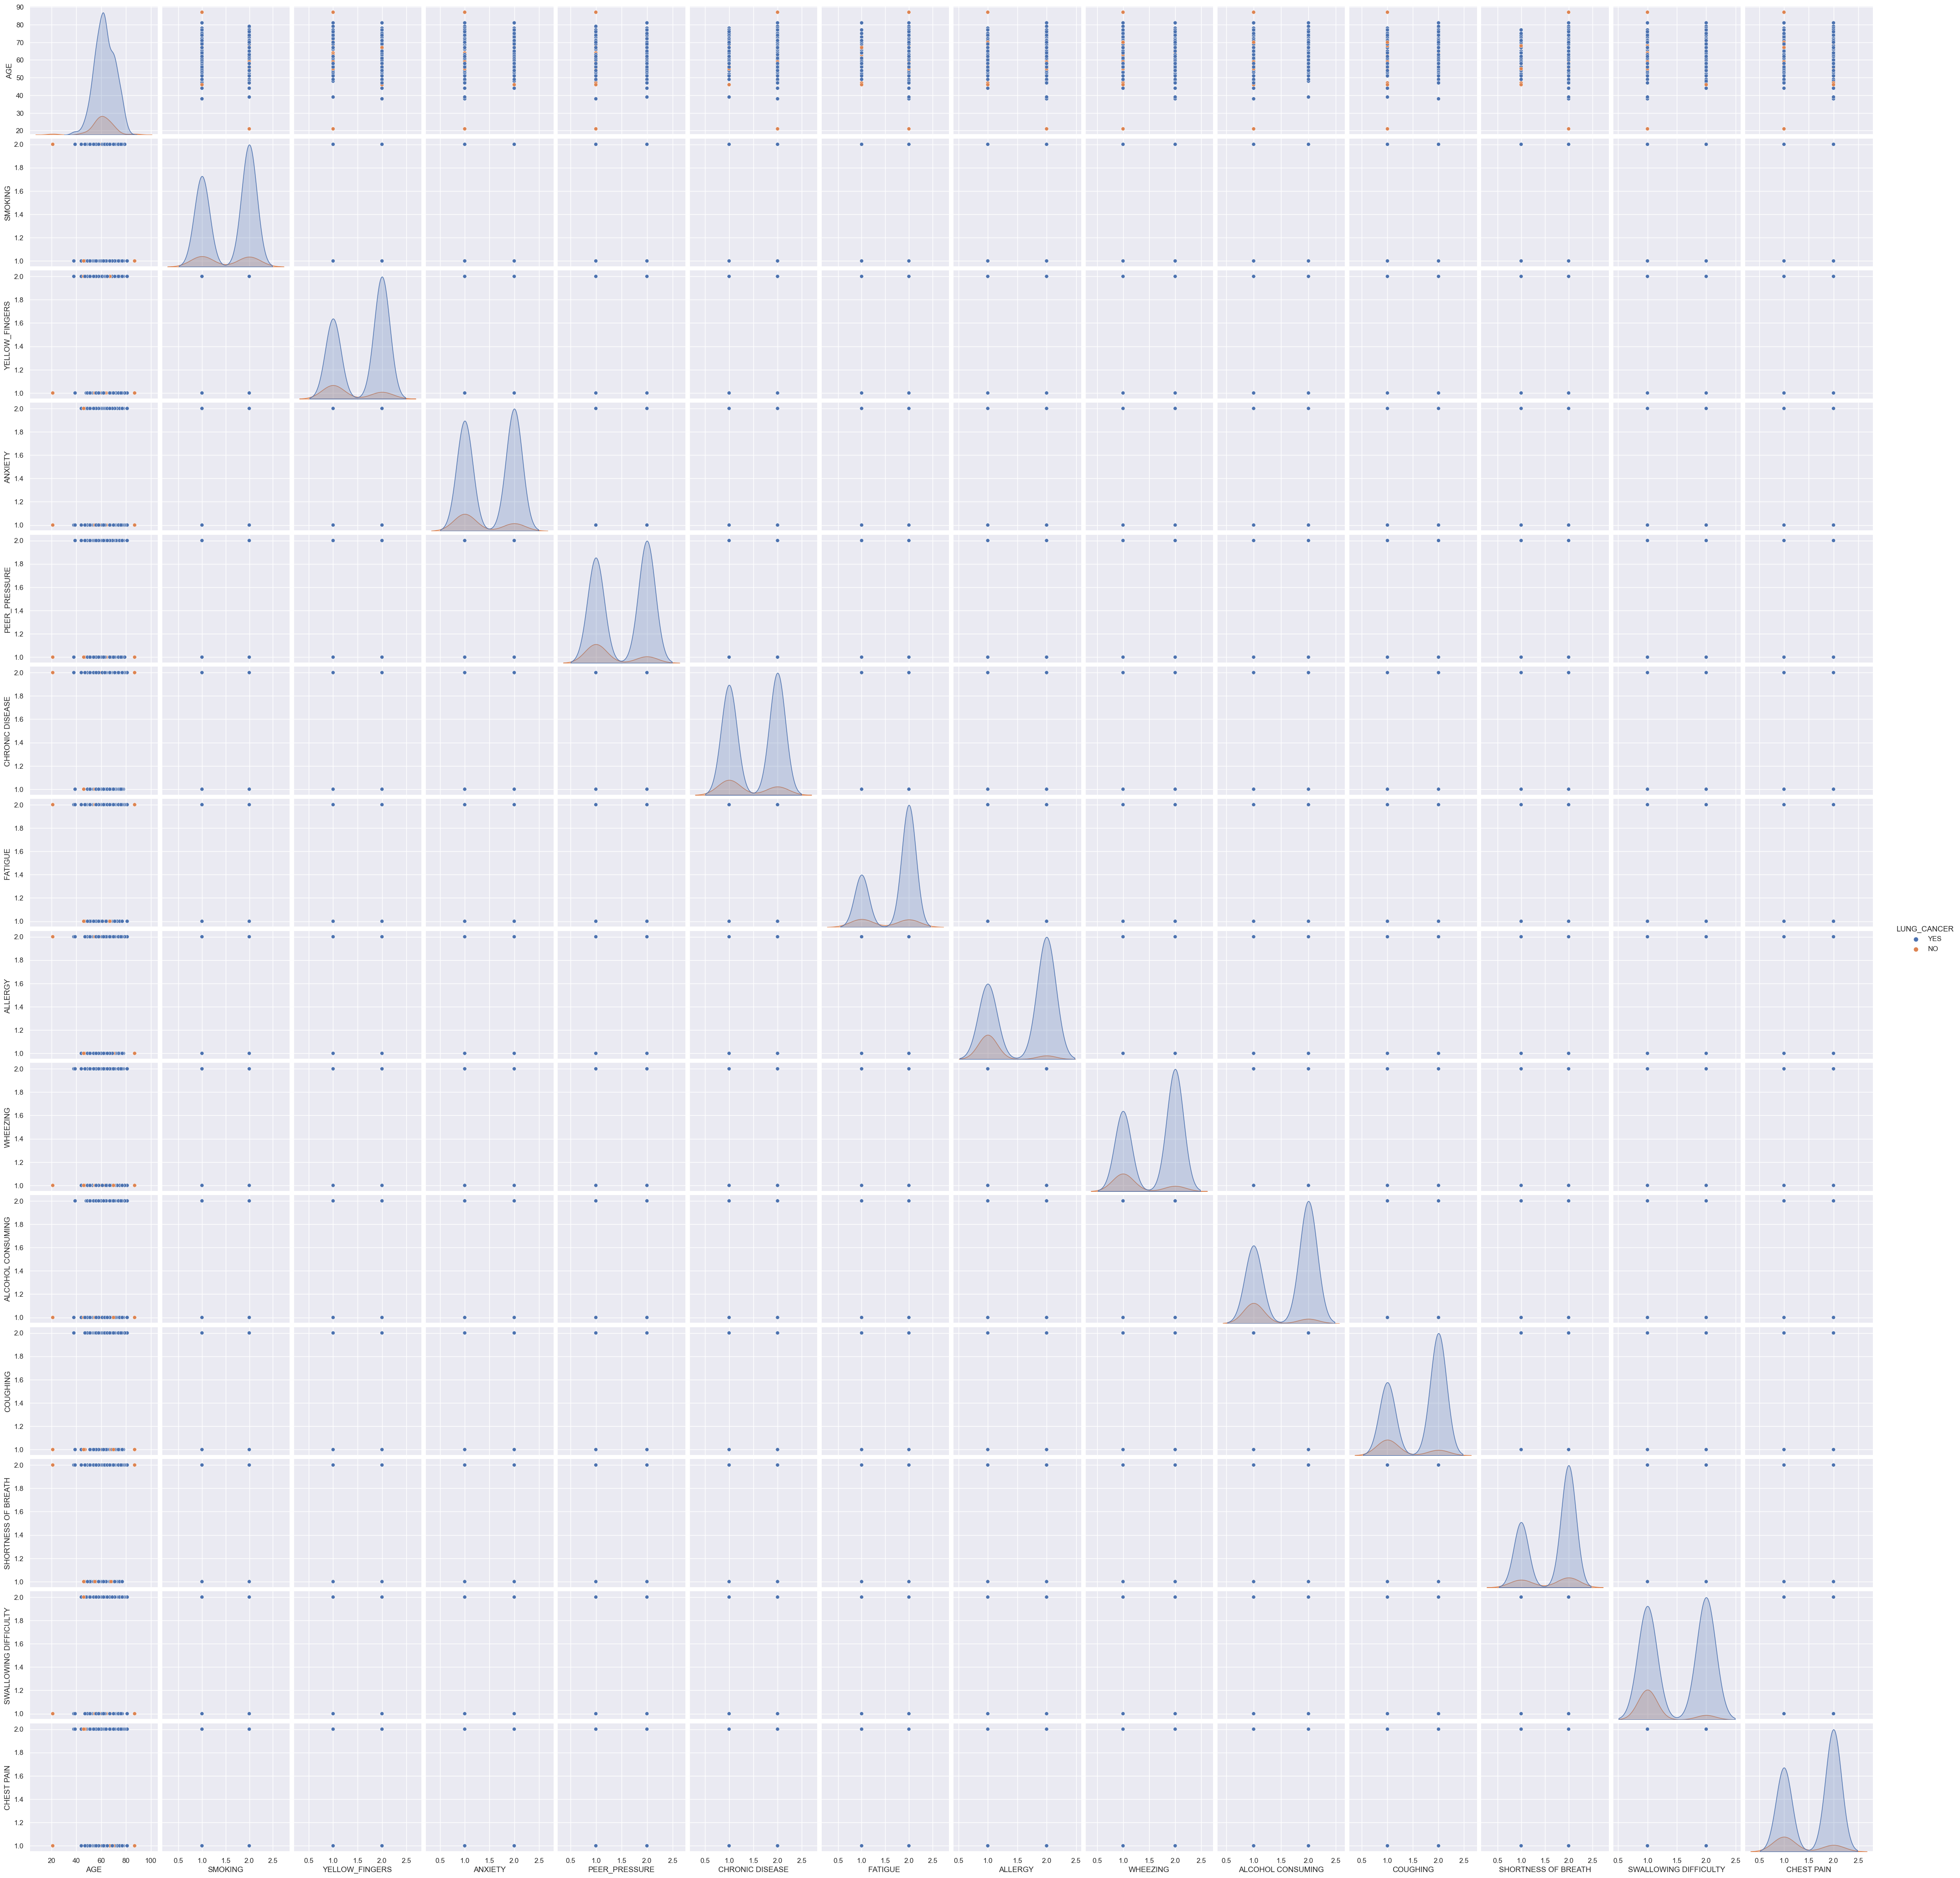

In [14]:
sns.pairplot(data,hue="LUNG_CANCER",size=3);
plt.show()

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

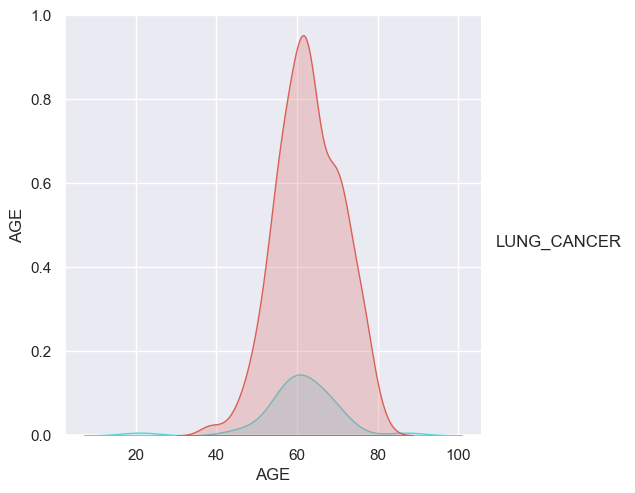

<Figure size 2000x1500 with 0 Axes>

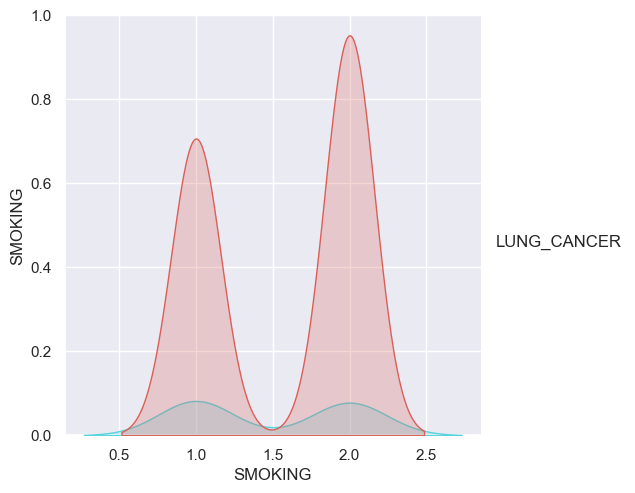

<Figure size 2000x1500 with 0 Axes>

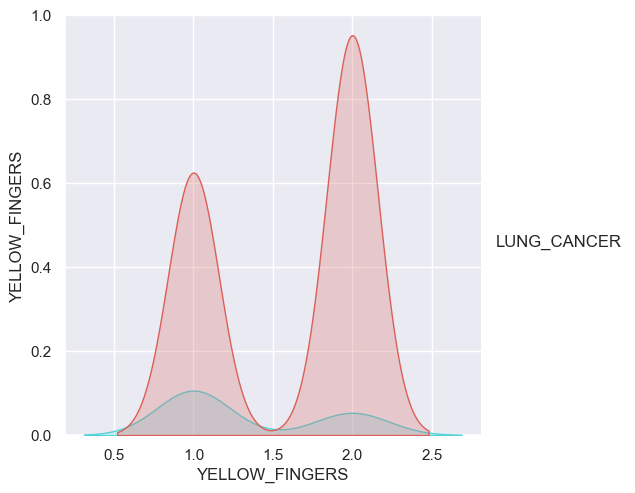

<Figure size 2000x1500 with 0 Axes>

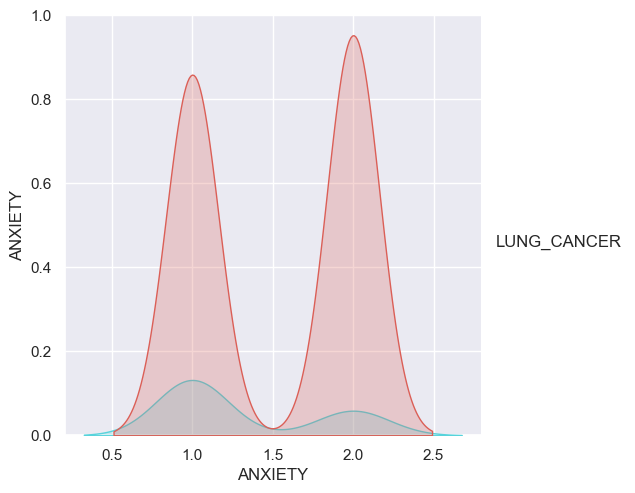

<Figure size 2000x1500 with 0 Axes>

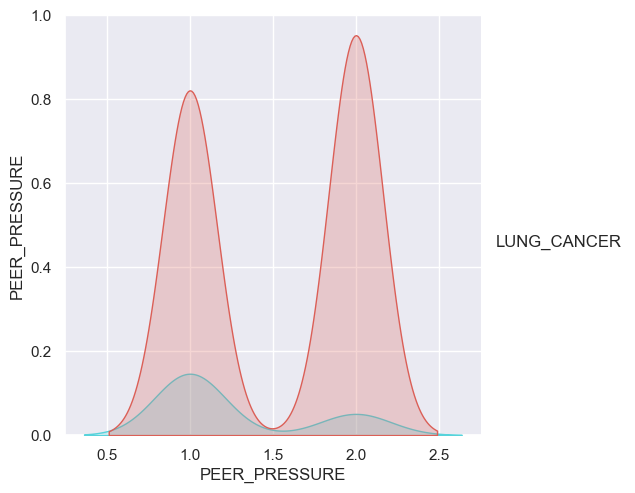

<Figure size 2000x1500 with 0 Axes>

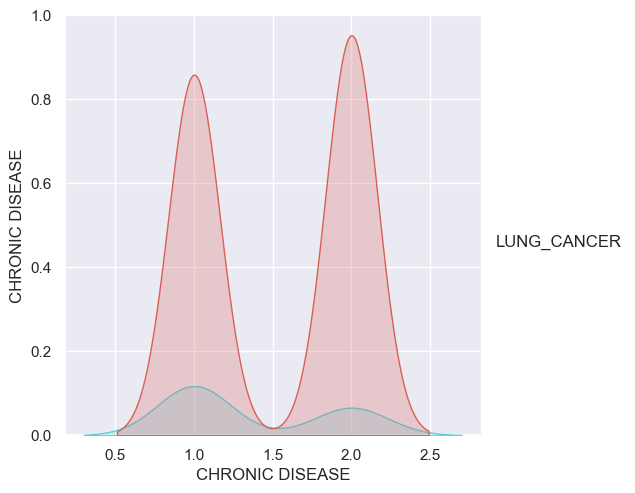

<Figure size 2000x1500 with 0 Axes>

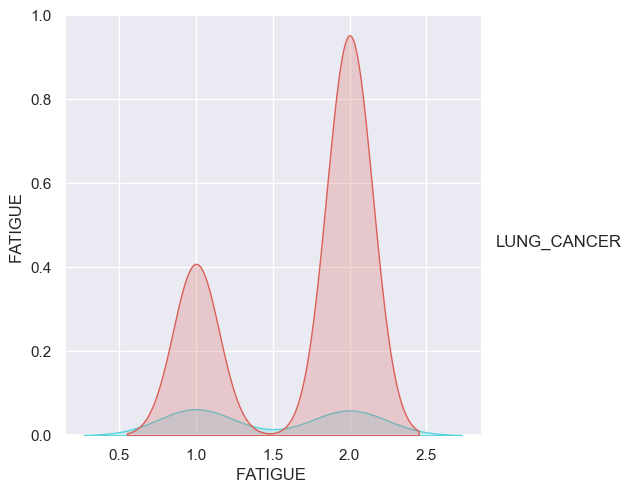

<Figure size 2000x1500 with 0 Axes>

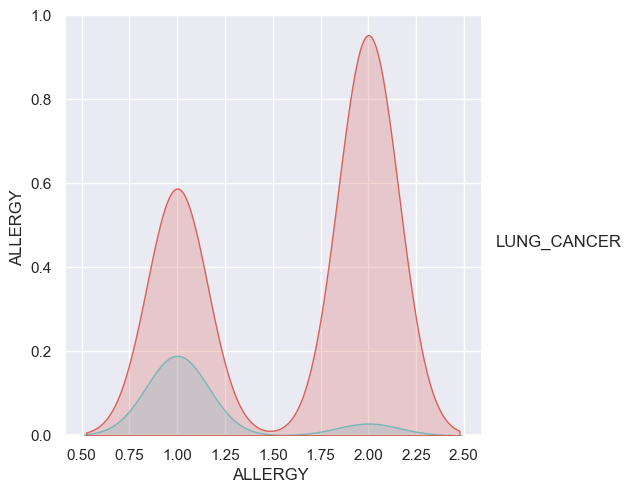

<Figure size 2000x1500 with 0 Axes>

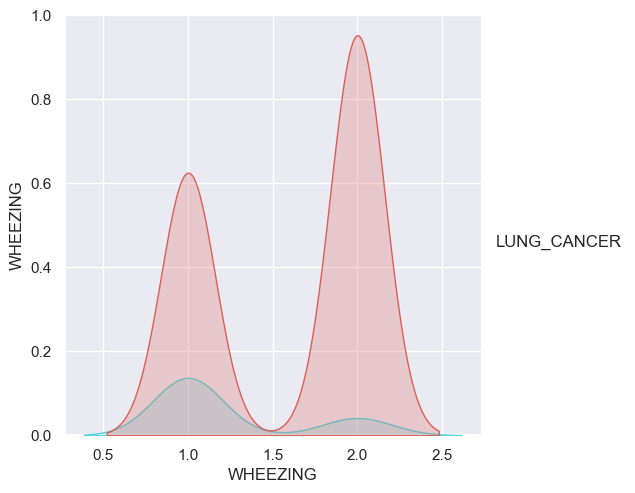

<Figure size 2000x1500 with 0 Axes>

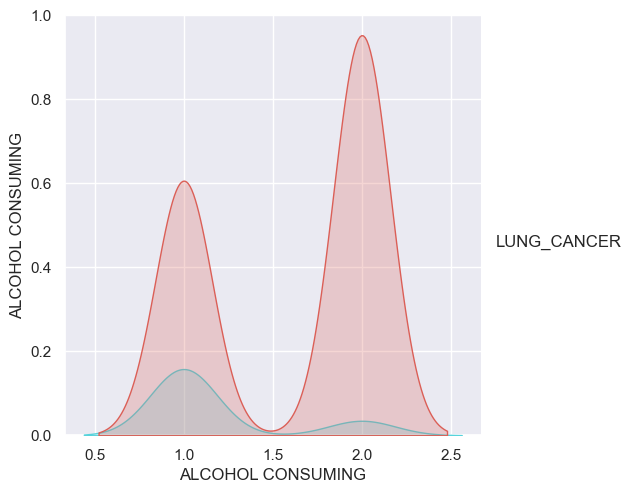

<Figure size 2000x1500 with 0 Axes>

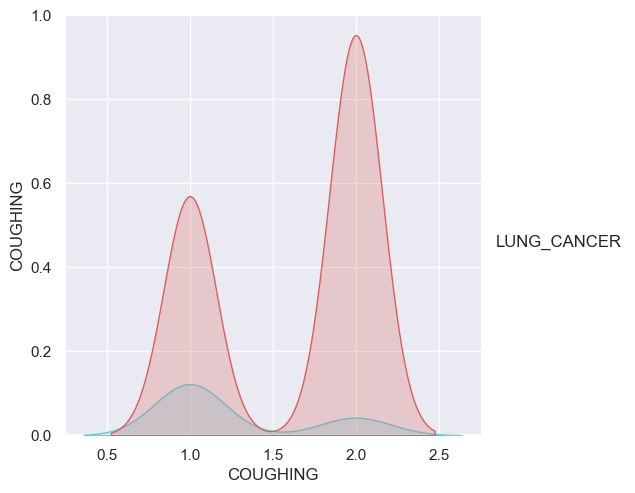

<Figure size 2000x1500 with 0 Axes>

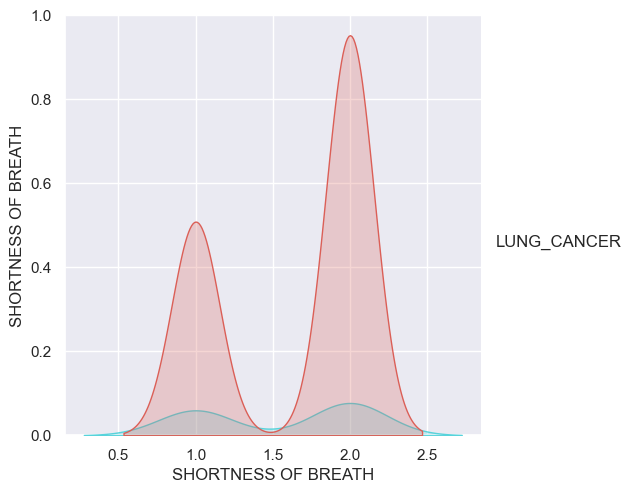

<Figure size 2000x1500 with 0 Axes>

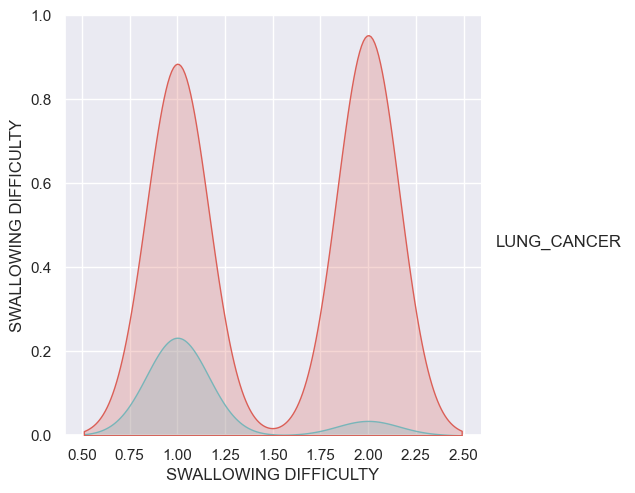

<Figure size 2000x1500 with 0 Axes>

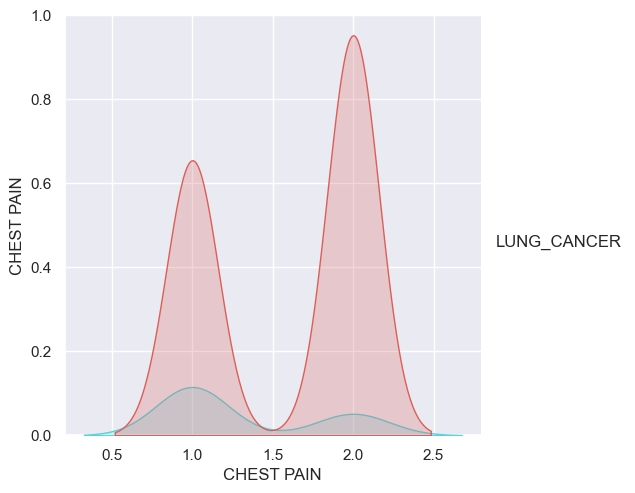

<Figure size 2000x1500 with 0 Axes>

In [15]:
cols = data.columns

for col in cols:
    plt.figure(figsize=(20,15))
    if data[col].dtype=='int64':
        sns.pairplot(data,hue='LUNG_CANCER',vars=[col],palette='hls',height=5)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('LUNG_CANCER', fontsize=14)
        plt.show()

# Preprocess Data

In [16]:
df = data.copy()

In [17]:
df['GENDER'] = df['GENDER'].map({
    'M':0,
    'F':1
})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({
    'YES':1,
    'NO':0
})


<h3>Lets visualize which column are correlated with LUNG_CANCER column.</h3>


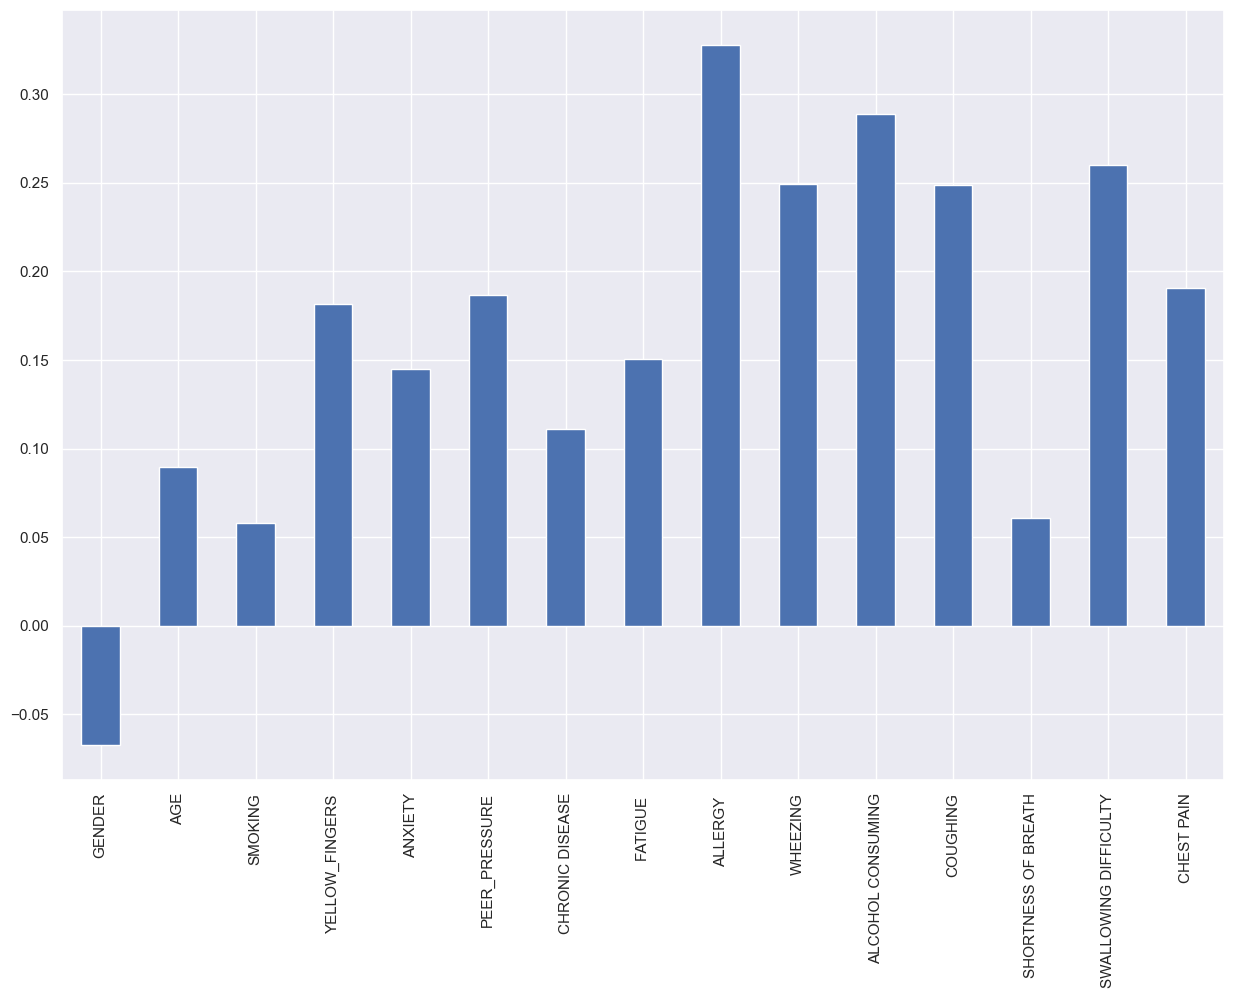

In [18]:
plt.figure(figsize=(15, 10))
df.drop(['LUNG_CANCER'], axis=1).corrwith(df['LUNG_CANCER']).plot.bar()
plt.show()

<h2>According to the above graph:</h2><br>
<h3>1. In our sample data males are more likely to diagnosed with lung cancer<h3>
<h3>2. All the other features indicate the higher the go the more likely for a person to be diagnosed with lung cancer<h3>

<h2>Now lets visualize correlation between features.</h2>

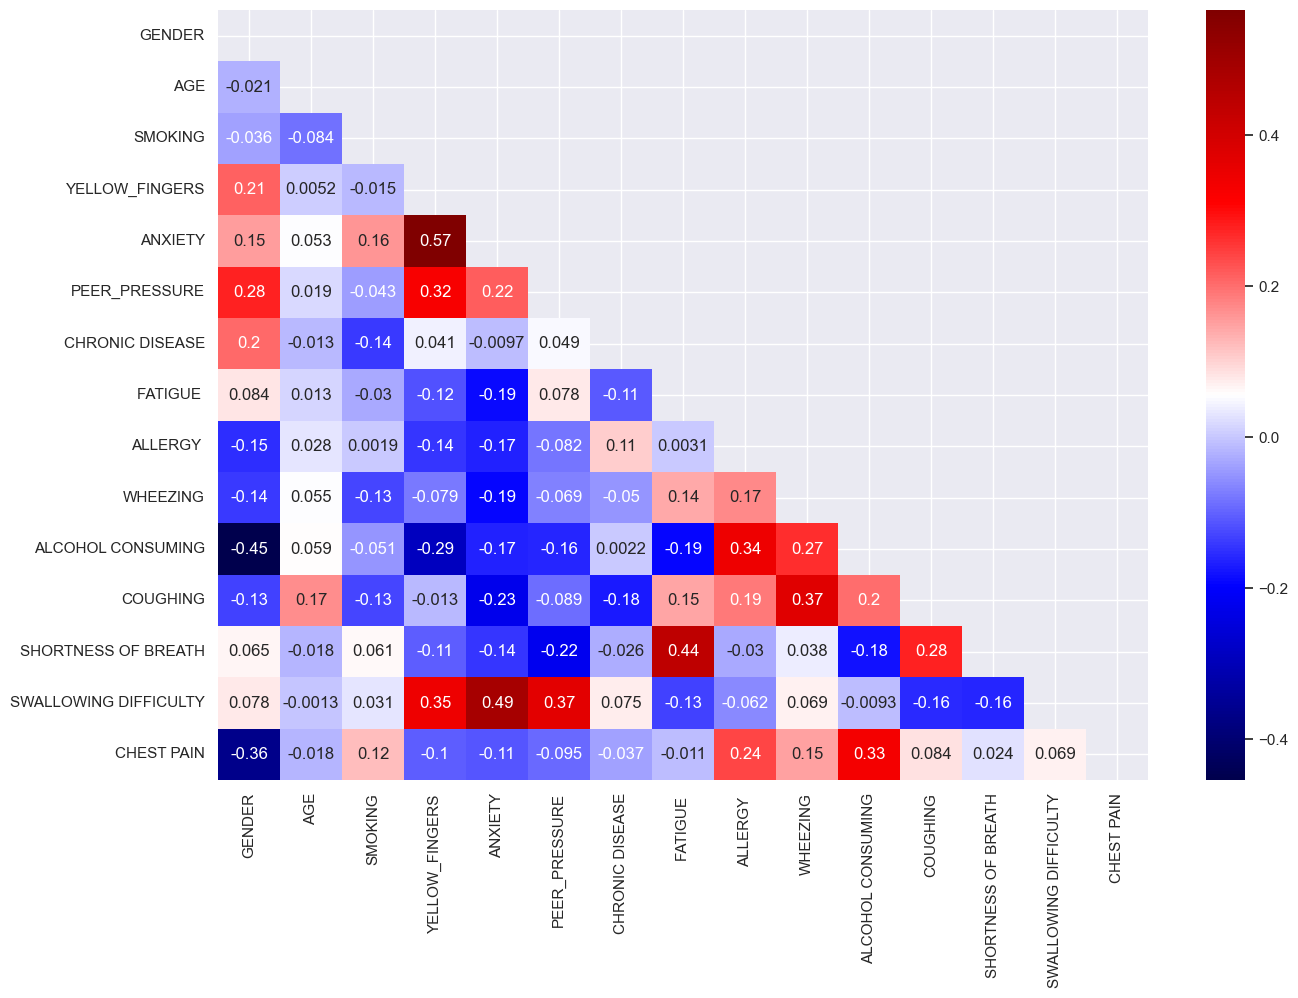

In [19]:
df2 = df.drop(['LUNG_CANCER'],axis=1)
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(df2.corr())).astype(bool)
sns.heatmap(df2.corr(),annot=True,cmap='seismic',mask=mask)
plt.show()

# There are some features that exhibit strong correlations with each other.

## According to the dataset:
- Anxiety, peer pressure, yellow fingers, and swallowing difficulty are strongly correlated with one another.
- As expected, fatigue is strongly correlated with swallowing difficulty.
- Allergy is strongly correlated with chest pain and alcohol consumption.
- Wheezing is strongly correlated with coughing and alcohol consumption.
- Coughing is strongly correlated with shortness of breath.


# We will create a model using RandomForrestClassifier which will aim to predict Lung Cancer.

## Lets define inputs and targets for our model.
- Targets will be LUNG_CANCER column.
- Inputs will be all the other features.

In [20]:
inputs = df.drop(['LUNG_CANCER'],axis=1)
targets = df['LUNG_CANCER']

## Split our dataset to train, test and validation data.
### Training data will be 80% adn Test data will be 20% of our data.

In [21]:
x_train,x_test,y_train,y_test = train_test_split(inputs,targets,test_size=0.3,random_state=42)

## Outline our model

In [22]:
rfc = RandomForestClassifier()

## Training

In [23]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

                precision    recall  f1-score   support

No_Lung_Cancer       0.83      0.71      0.77         7
   Lung_Cancer       0.98      0.99      0.98        86

      accuracy                           0.97        93
     macro avg       0.91      0.85      0.88        93
  weighted avg       0.97      0.97      0.97        93



<Axes: >

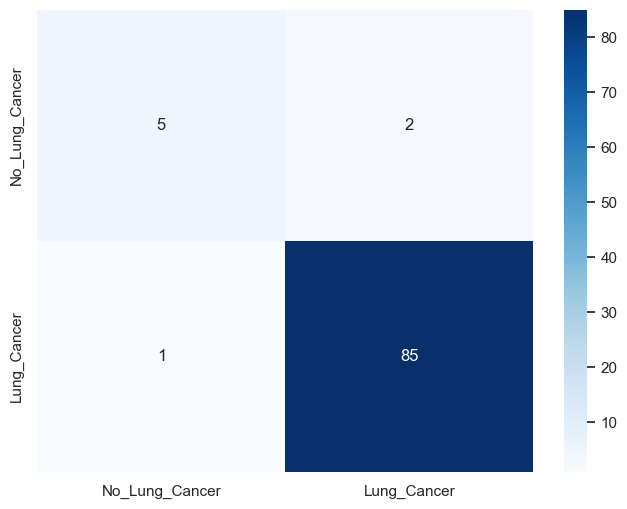

In [24]:
y_pred = rfc.predict(x_test)
print(classification_report(y_test,y_pred,target_names=['No_Lung_Cancer', 'Lung_Cancer']))
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No_Lung_Cancer', 'Lung_Cancer'], yticklabels=['No_Lung_Cancer', 'Lung_Cancer'])

## Cross Validation

In [25]:
accurancies = cross_val_score(estimator=rfc,X=x_train, y=y_train, cv=5)
print('Model accuracy: %0.2f (+/- %0.2f)' % (accurancies.mean(), accurancies.std() * 2))

Model accuracy: 0.88 (+/- 0.07)


## Featuring Selection to increace accurancy.

In [26]:
rfe = RFE(estimator=rfc, n_features_to_select=10)
rfe = rfe.fit(x_train, y_train)
x_train.columns[rfe.support_]

Index(['AGE', 'YELLOW_FINGERS', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ',
       'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
       'SWALLOWING DIFFICULTY'],
      dtype='object')

## We will create a new Dataframe which will include only 10 features including the taraget (LUNG_CANCER column).

In [27]:
new_df = df[['AGE', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
       'FATIGUE ', 'ALLERGY ', 'ALCOHOL CONSUMING', 'COUGHING',
       'SWALLOWING DIFFICULTY','LUNG_CANCER']]

In [28]:
new_df.head()

,AGE,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,LUNG_CANCER
0,69,2,2,1,1,2,1,2,2,2,1
1,74,1,1,1,2,2,2,1,1,2,1
2,59,1,1,2,1,2,1,1,2,1,0
3,63,2,2,1,1,1,1,2,1,2,0
4,63,2,1,1,1,1,1,1,2,1,0


In [29]:
inputs = new_df.drop(['LUNG_CANCER'],axis=1)
targets = new_df['LUNG_CANCER']
x_train,x_test,y_train,y_test = train_test_split(inputs,targets,test_size=0.3,random_state=42)

In [30]:
rfc2 = RandomForestClassifier()
rfc2.fit(x_train,y_train)
y_pred_2 = rfc2.predict(x_test)

                precision    recall  f1-score   support

No_Lung_Cancer       1.00      0.71      0.83         7
   Lung_Cancer       0.98      1.00      0.99        86

      accuracy                           0.98        93
     macro avg       0.99      0.86      0.91        93
  weighted avg       0.98      0.98      0.98        93



<Axes: >

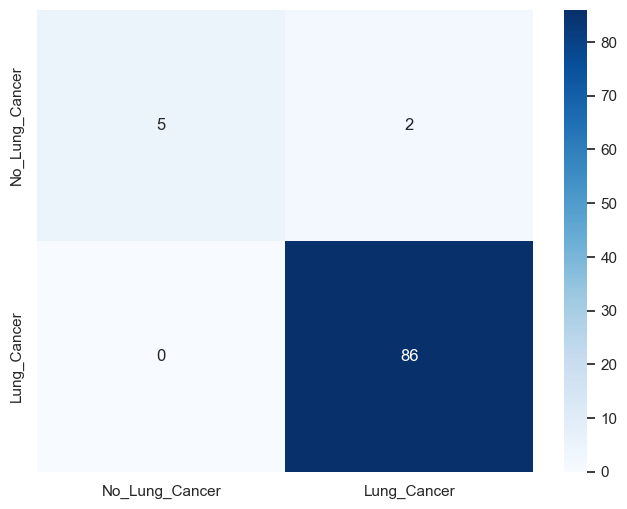

In [31]:
print(classification_report(y_test,y_pred_2,target_names=['No_Lung_Cancer', 'Lung_Cancer']))
cm = confusion_matrix(y_test,y_pred_2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No_Lung_Cancer', 'Lung_Cancer'], yticklabels=['No_Lung_Cancer', 'Lung_Cancer'])

## Overall accurancy increased.

## Tuning our model in order to increase its acurrancy

In [32]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [33]:
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, refit=True,verbose=1)

In [34]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [35]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

                precision    recall  f1-score   support

No_Lung_Cancer       1.00      0.71      0.83         7
   Lung_Cancer       0.98      1.00      0.99        86

      accuracy                           0.98        93
     macro avg       0.99      0.86      0.91        93
  weighted avg       0.98      0.98      0.98        93



<Axes: >

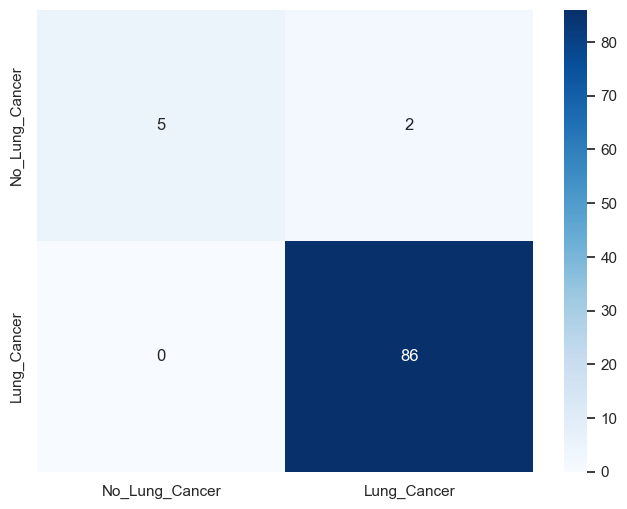

In [36]:
grid_pred = grid.predict(x_test)
print(classification_report(y_test,grid_pred,target_names=['No_Lung_Cancer', 'Lung_Cancer']))
cm = confusion_matrix(y_test,grid_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No_Lung_Cancer', 'Lung_Cancer'], yticklabels=['No_Lung_Cancer', 'Lung_Cancer'])

# Results:
## The model demonstrates high overall performance with exceptional precision and F1-score for both classes. 
## However, the lower recall for the "No_Lung_Cancer" class suggests that the model may miss some instances of no lung cancer. 
## Further investigation and refinement of the model may be necessary to improve its performance in correctly identifying instances of no lung cancer.
## Increasing the dataset size could potentially enhance the model's ability to generalize and capture more diverse patterns, leading to better identification of instances without lung cancer.

# Saving the model.

In [37]:
joblib.dump(rfc, 'final_model.pkl')

['final_model.pkl']

# Training Dataset Predictions.

In [38]:
final_model = joblib.load('final_model.pkl')
predictions = final_model.predict(df.drop(['LUNG_CANCER'],axis=1))
predictions_df = pd.DataFrame(predictions, columns=['Predicted_LUNG_CANCER'])
df_test = pd.concat([df[['LUNG_CANCER']], predictions_df], axis=1)

In [39]:
pd.options.display.max_rows = None
print(df_test)

     LUNG_CANCER  Predicted_LUNG_CANCER
0              1                      1
1              1                      1
2              0                      0
3              0                      1
4              0                      0
5              1                      1
6              1                      1
7              1                      1
8              0                      0
9              1                      1
10             1                      1
11             1                      1
12             0                      0
13             1                      1
14             0                      0
15             1                      1
16             1                      1
17             1                      1
18             1                      1
19             0                      1
20             1                      1
21             1                      1
22             0                      0
23             1                      1


In [40]:
count_mismatch = (df_test['Predicted_LUNG_CANCER'] != df_test['LUNG_CANCER']).sum()
print("Number of rows where the values in the second column don't match the values in the third column:", count_mismatch)

Number of rows where the values in the second column don't match the values in the third column: 4
